##  House Prices Prediction in Nigeria Model

ABOUT

Wazobia Real Estate Limited, a leading real estate company in Nigeria, has embarked on an ambitious project to tackle a    crucial challenge in the industry. The company is determined to provide accurate and competitive pricing for houses, but accurately predicting house prices in the current market has proven to be a significant hurdle. To address this issue, Wazobia Real Estate has sought our expertise to develop a powerful and accurate predictive model.

GOAL

The primary goal of this project is to create a robust and precise predictive model capable of estimating house prices in Nigeria. This entails analyzing different factors that influence house prices, discerning significant patterns, and constructing a dependable model for generating price predictions. Successful completion of this endeavor will enable the company to make well-informed pricing decisions, strengthen its competitiveness in the market, and provide added value to its customers.

DATASET

The dataset for this project is available here https://zindi.africa/competitions/free-ai-classes-in-every-city-hackathon-2023/data

HIGHLIGHTS:
The following will be done:


### Importing Libraries

In [ ]:
# Import all the libraries needed

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models from Scikit-Learn
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Feature selection technique
from sklearn.feature_selection import (mutual_info_regression,
                                       f_regression, SelectKBest, chi2, mutual_info_classif)


### Load Data

In [ ]:
#Importing dataset
df = pd.read_csv("Housing_dataset_train.csv", index_col='ID')
df.head()
df.shape # (rows, columns)

FileNotFoundError: ignored

### Data Exploration

In [ ]:
#View data
df.head()

,loc,title,bedroom,bathroom,parking_space,price
ID,,,,,,
3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [ ]:
#Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [ ]:
#Columns
df.columns

Index(['ID', 'loc', 'title', 'bedroom', 'bathroom', 'parking_space', 'price'], dtype='object')

In [ ]:
df.dtypes

ID                 int64
loc               object
title             object
bedroom          float64
bathroom         float64
parking_space    float64
price            float64
dtype: object

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,14000.0,4.862700e+03,3.818348e+03,0.00,1.672750e+03,3.527000e+03,8011.250,12999.00
bedroom,12201.0,4.308171e+00,2.441165e+00,1.00,2.000000e+00,4.000000e+00,6.000,9.00
bathroom,12195.0,3.134235e+00,2.035950e+00,1.00,1.000000e+00,2.000000e+00,5.000,7.00
parking_space,12189.0,3.169825e+00,1.599415e+00,1.00,2.000000e+00,3.000000e+00,4.000,6.00
price,14000.0,2.138082e+06,1.083057e+06,431967.29,1.393990e+06,1.895223e+06,2586699.494,16568486.16


In [ ]:
# Are there any missing values?
df.isna().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

Exploring Missing Values

In [ ]:
null_features = df.columns[df.isnull().any()]
missing_percentages = (df[null_features].isnull().sum() / len(df)) * 100
print(missing_percentages.round(2))

loc              12.95
title            12.30
bedroom          12.85
bathroom         12.89
parking_space    12.94
dtype: float64


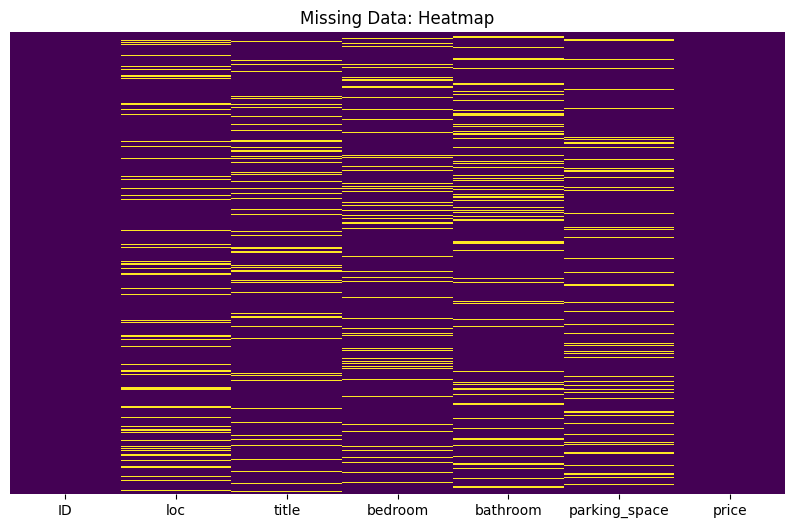

In [ ]:
#visualizing null data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data: Heatmap')
plt.show()

In [ ]:
# Calculate the sum of null features for each observation (row)
sum_null_per_observation = df.isnull().sum(axis=1)
sum_null_per_observation
# Count the occurrences of each sum value
null_sum_counts = sum_null_per_observation.value_counts()

# Calculate the percentage of observations for each sum value
null_sum_percentages = (null_sum_counts / len(sum_null_per_observation)) * 100

# Output the percentage of observations for each sum value
print("Percentage of Observations for Each Sum of Null Features:")
print(null_sum_percentages)

Percentage of Observations for Each Sum of Null Features:
1    55.221429
0    40.635714
2     3.721429
3     0.421429
dtype: float64


Comment: 40% of columns are complete, 55% have 1 missing feature together that's over 95% of the data

In [ ]:
#check bedroom outliers
#checking outliers
Q1 = df['bedroom'].quantile(0.25)
Q3 = df['bedroom'].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for identifying outliers (adjust?)
outlier_threshold = 1.5

# Identify outliers
outliers = ((df['bedroom'] < (Q1 - outlier_threshold * IQR)) | (df['bedroom'] > (Q3 + outlier_threshold * IQR)))

# Print the rows with outliers
print(df[outliers])



Empty DataFrame
Columns: [ID, loc, title, bedroom, bathroom, parking_space, price]
Index: []


In [ ]:
#check bathroom outliers
#checking outliers
Q1 = df['bathroom'].quantile(0.25)
Q3 = df['bathroom'].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for identifying outliers (adjust?)
outlier_threshold = 1.5

# Identify outliers
outliers = ((df['bathroom'] < (Q1 - outlier_threshold * IQR)) | (df['bathroom'] > (Q3 + outlier_threshold * IQR)))
print(df[outliers])

Empty DataFrame
Columns: [ID, loc, title, bedroom, bathroom, parking_space, price]
Index: []


In [ ]:
#check parking_space outliers
#checking outliers
Q1 = df['parking_space'].quantile(0.25)
Q3 = df['parking_space'].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for identifying outliers (adjust?)
outlier_threshold = 1.5

# Identify outliers
outliers = ((df['parking_space'] < (Q1 - outlier_threshold * IQR)) | (df['parking_space'] > (Q3 + outlier_threshold * IQR)))
print(df[outliers])

Empty DataFrame
Columns: [ID, loc, title, bedroom, bathroom, parking_space, price]
Index: []


In [ ]:
#POSSIBLY DELETE THIS BLOCK

#check price outliers
#checking outliers
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for identifying outliers (adjust?)
outlier_threshold = 1.5

# Identify outliers
outliers = ((df['price'] < (Q1 - outlier_threshold * IQR)) | (df['price'] > (Q3 + outlier_threshold * IQR)))

df_outliers = df[outliers]
# Print the rows with outliers
print(f"There are {df_outliers.shape[0]} outliers in terms of price")

There are 568 outliers in terms of price


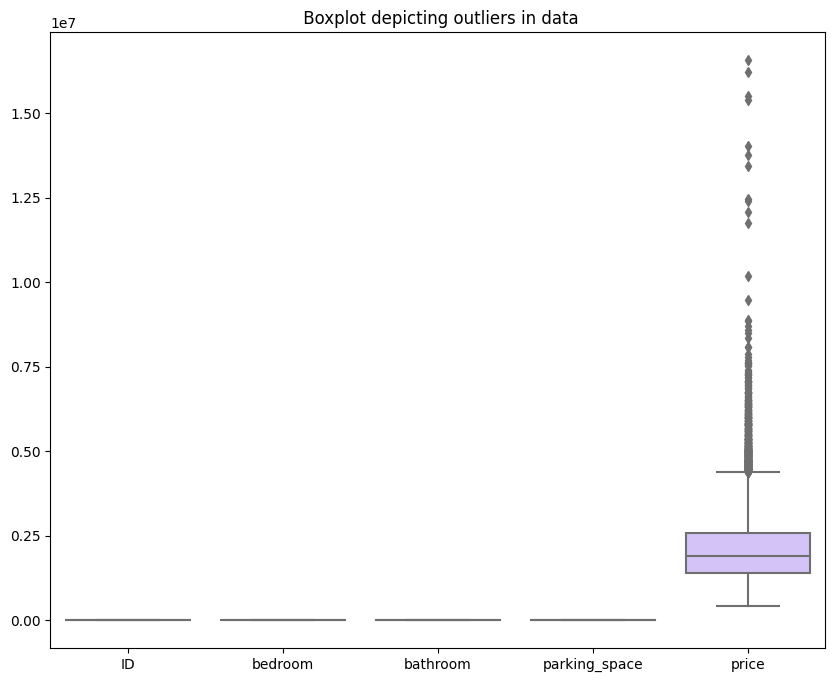

In [ ]:
#visualizing outliers
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, palette='pastel')
plt.title(' Boxplot depicting outliers in data')
plt.show()

In [ ]:
#how much missing info in outliers?
df_outliers.isna().sum()

ID                0
loc              79
title            73
bedroom          75
bathroom         79
parking_space    73
price             0
dtype: int64

### Data Visualization

In [ ]:
#categorical

In [ ]:
df['loc'].unique()

array(['Katsina', 'Ondo', 'Ekiti', 'Anambra', 'Kogi', 'Borno', 'Kwara',
       'Osun', 'Kaduna', 'Ogun', 'Bayelsa', nan, 'Abia', 'Rivers',
       'Taraba', 'Ebonyi', 'Kebbi', 'Enugu', 'Edo', 'Nasarawa', 'Delta',
       'Kano', 'Yobe', 'Benue', 'Bauchi', 'Cross River', 'Niger',
       'Adamawa', 'Plateau', 'Imo', 'Oyo', 'Zamfara', 'Sokoto', 'Jigawa',
       'Gombe', 'Akwa Ibom', 'Lagos'], dtype=object)

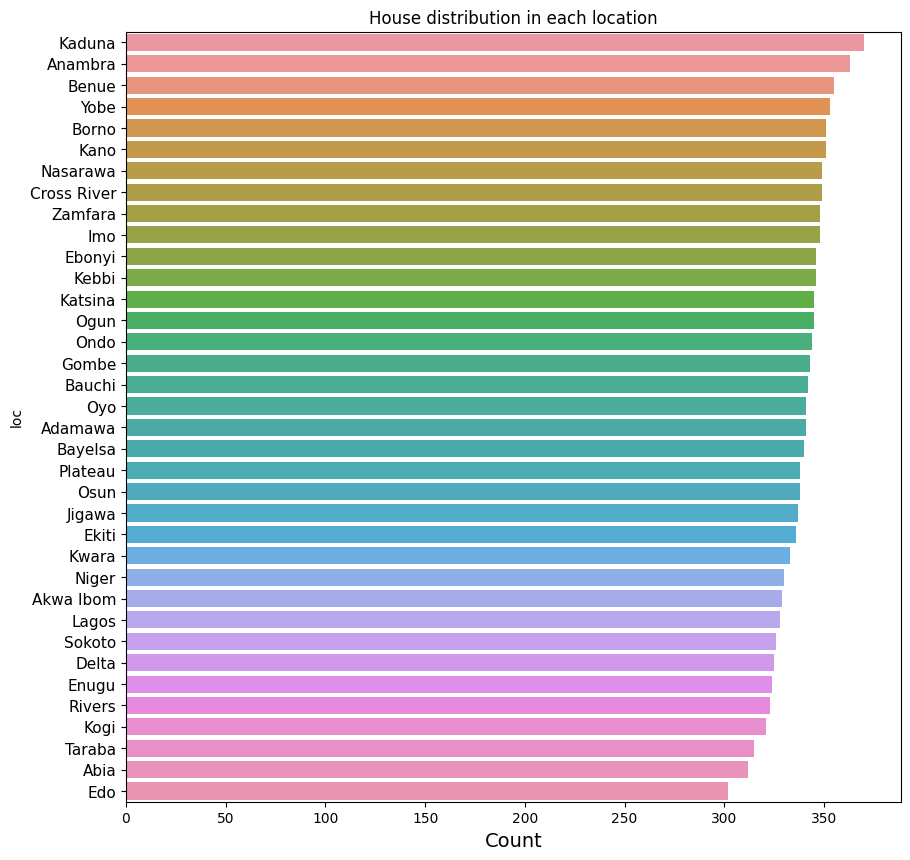

In [ ]:
plt.figure(figsize = (10,10))
ax = sns.countplot(y=df['loc'],order=df['loc'].value_counts().index)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=11)
ax.set_title('House distribution in each location',fontsize=12)
ax.set_xlabel('Count',fontsize=14)
plt.show()

this visualising interpretation?

In [ ]:
price_group = df.groupby('loc')['price'].mean()
price_group = price_group.sort_values(ascending = False)

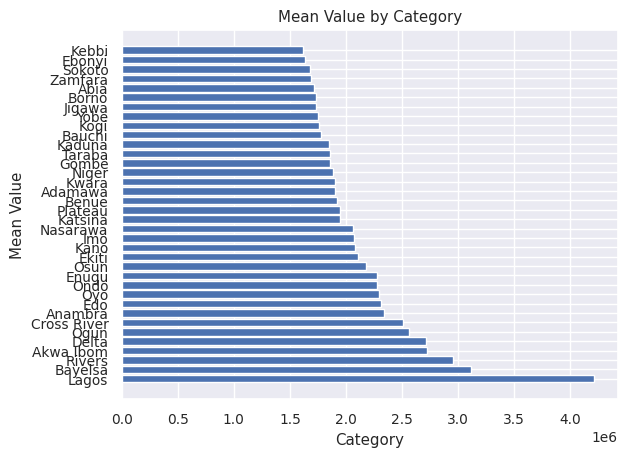

In [ ]:
plt.barh(price_group.index, price_group.values)
plt.xlabel('Price')
plt.ylabel('Location')
plt.title('Mean Price by Location')
plt.show()

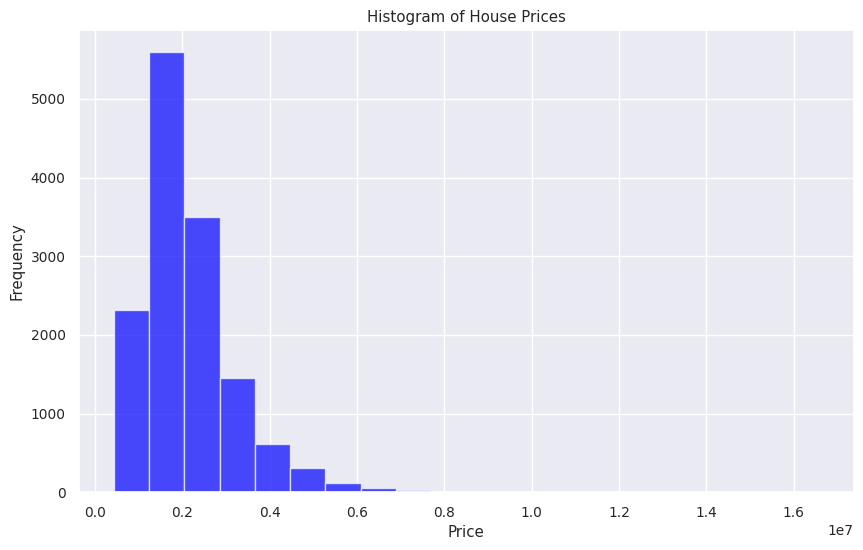

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df['price'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

(13432, 7)

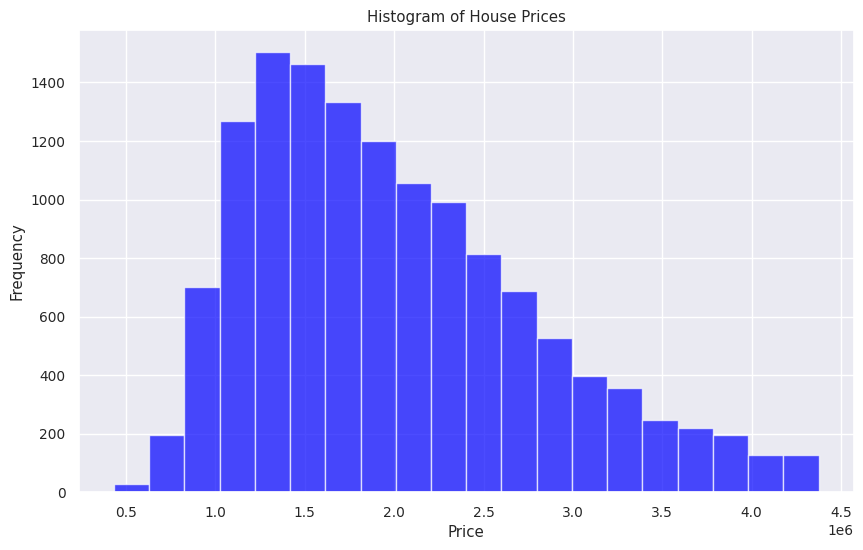

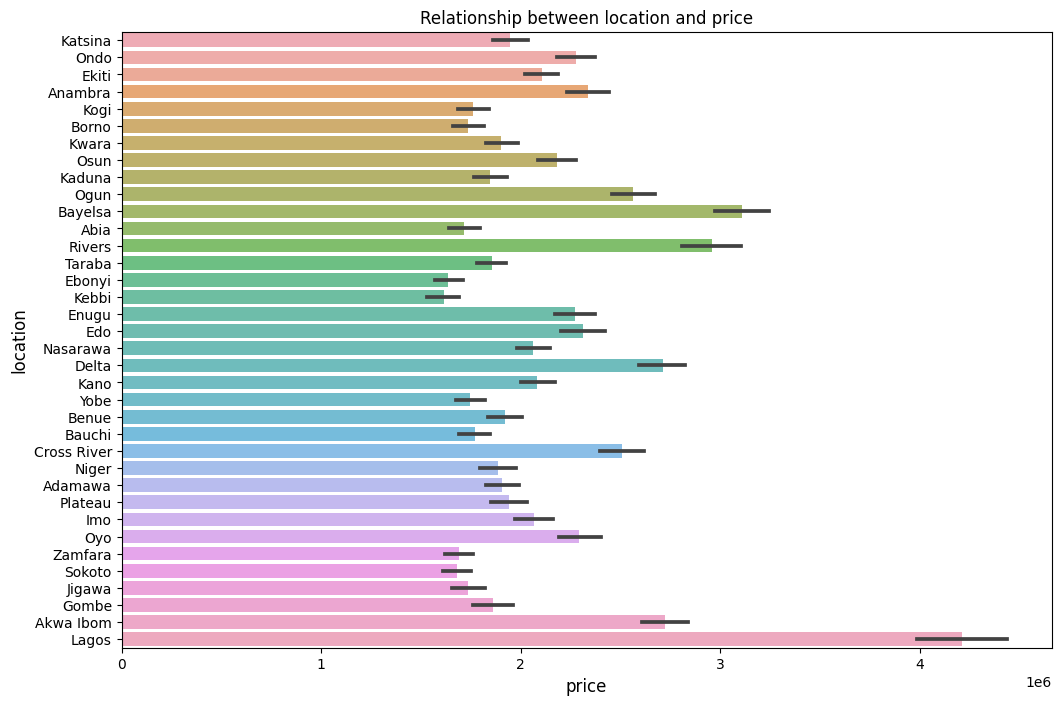

In [ ]:
plt.figure(figsize = (12, 8))
sns.barplot(y = df['loc'], x = df['price'], alpha = 0.8)
plt.title('Relationship between location and price')
plt.xlabel('price', fontsize = 12)
plt.ylabel('location', fontsize = 12)
plt.show()

,loc,title,bedroom,bathroom,parking_space,price
ID,,,,,,
3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [ ]:
title_count = df.title.value_counts()
title_count

Flat                    1372
Apartment               1331
Townhouse               1327
Mansion                 1322
Detached duplex         1312
Penthouse               1306
Semi-detached duplex    1299
Bungalow                1293
Terrace duplex          1266
Cottage                  450
Name: title, dtype: int64

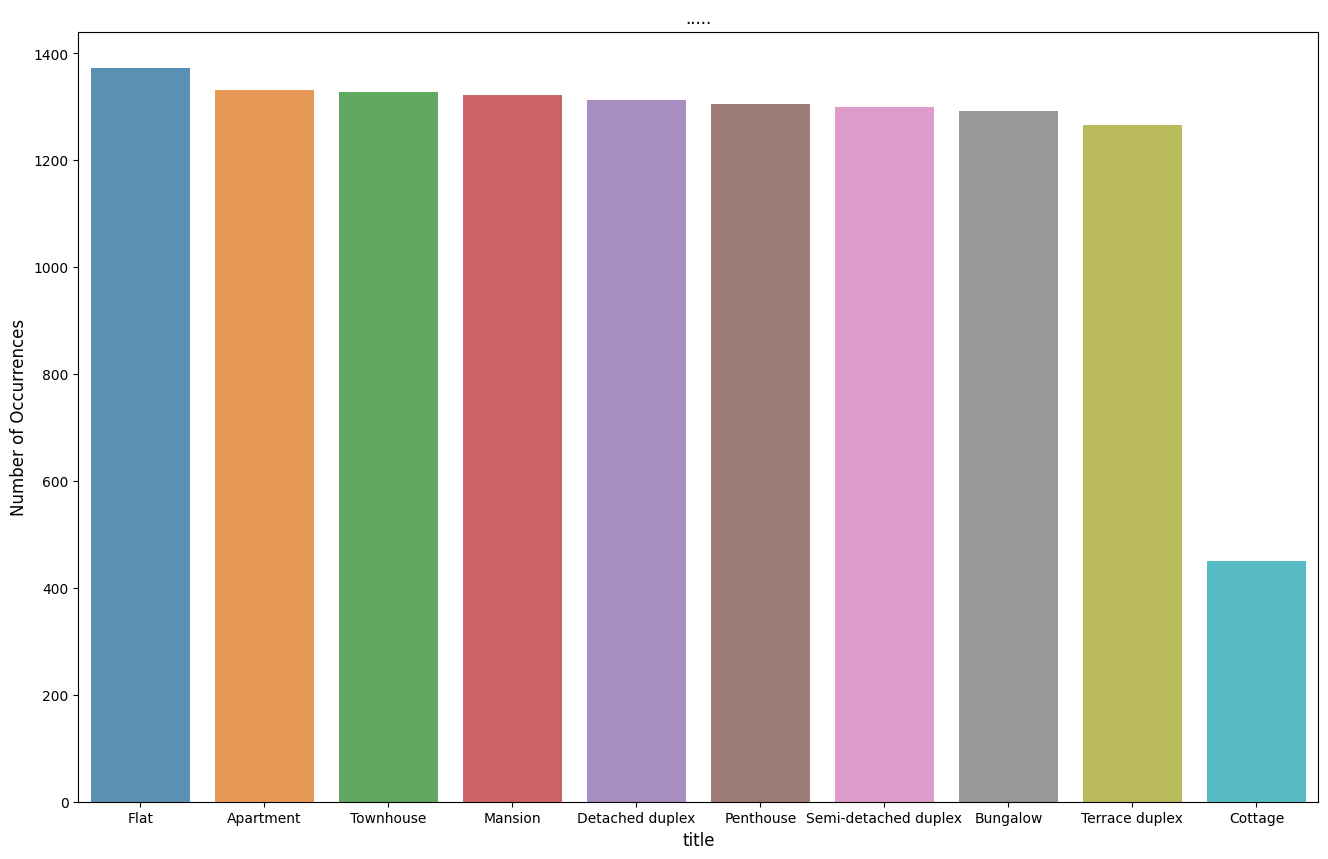

In [ ]:
plt.figure(figsize = (16, 10))
sns.barplot(x = title_count.index, y = title_count.values, alpha = 0.8)
plt.title('.....')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('title', fontsize = 12)
plt.show()

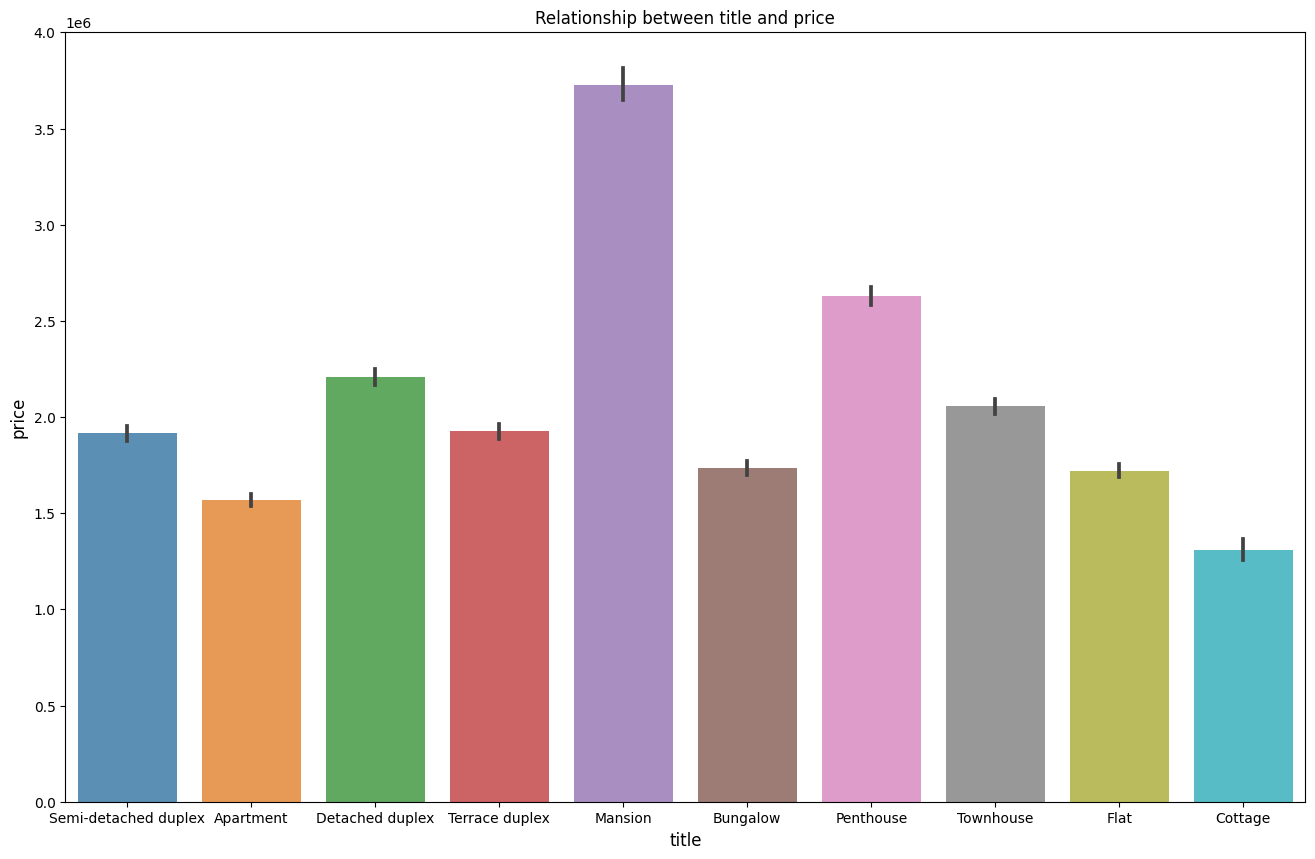

In [ ]:
plt.figure(figsize = (16, 10))
sns.barplot(x = df['title'], y = df['price'], alpha = 0.8)
plt.title('Relationship between title and price')
plt.ylabel('price', fontsize = 12)
plt.xlabel('title', fontsize = 12)
plt.show()

In [ ]:
bedroom_count = df['bedroom'].value_counts()
bedroom_count

5.0    1789
2.0    1741
1.0    1738
3.0    1736
4.0    1641
6.0     908
7.0     888
9.0     883
8.0     877
Name: bedroom, dtype: int64

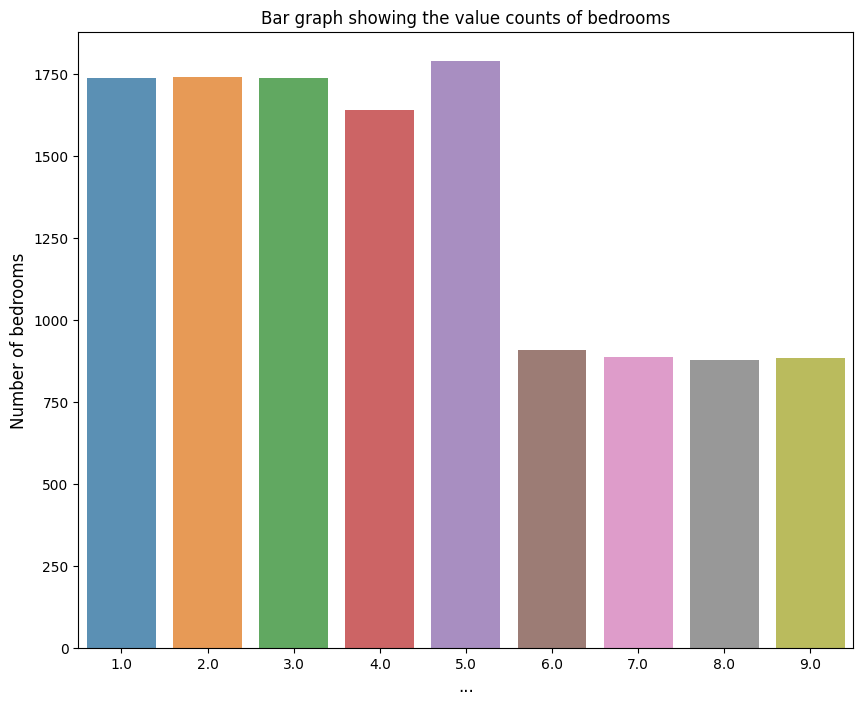

In [ ]:
plt.figure(figsize = (10, 8))
sns.barplot(x = bedroom_count.index, y = bedroom_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of bedrooms')
plt.ylabel('Number of bedrooms', fontsize = 12)
plt.xlabel('...', fontsize = 12)
plt.show()

In [ ]:
bathroom_count = df['bathroom'].value_counts()
bathroom_count

1.0    3272
2.0    3255
7.0    1156
5.0    1143
6.0    1138
3.0    1119
4.0    1112
Name: bathroom, dtype: int64

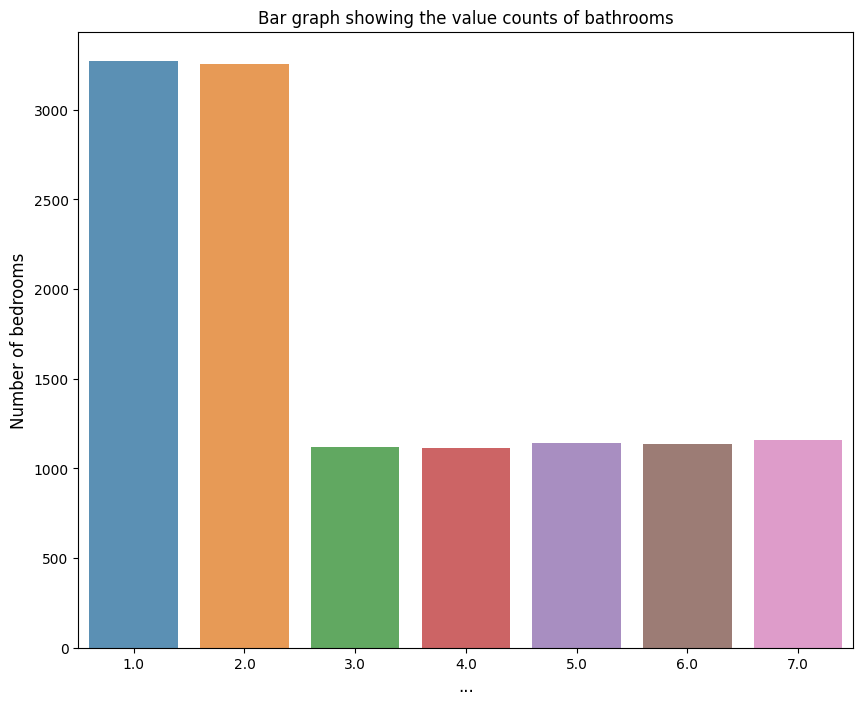

In [ ]:
plt.figure(figsize = (10, 8))
sns.barplot(x = bathroom_count.index, y = bathroom_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of bathrooms')
plt.ylabel('Number of bedrooms', fontsize = 12)
plt.xlabel('...', fontsize = 12)
plt.show()

In [ ]:
parking_space_count = df['parking_space'].value_counts()
parking_space_count

4.0    2419
2.0    2394
3.0    2378
1.0    2324
6.0    1345
5.0    1329
Name: parking_space, dtype: int64

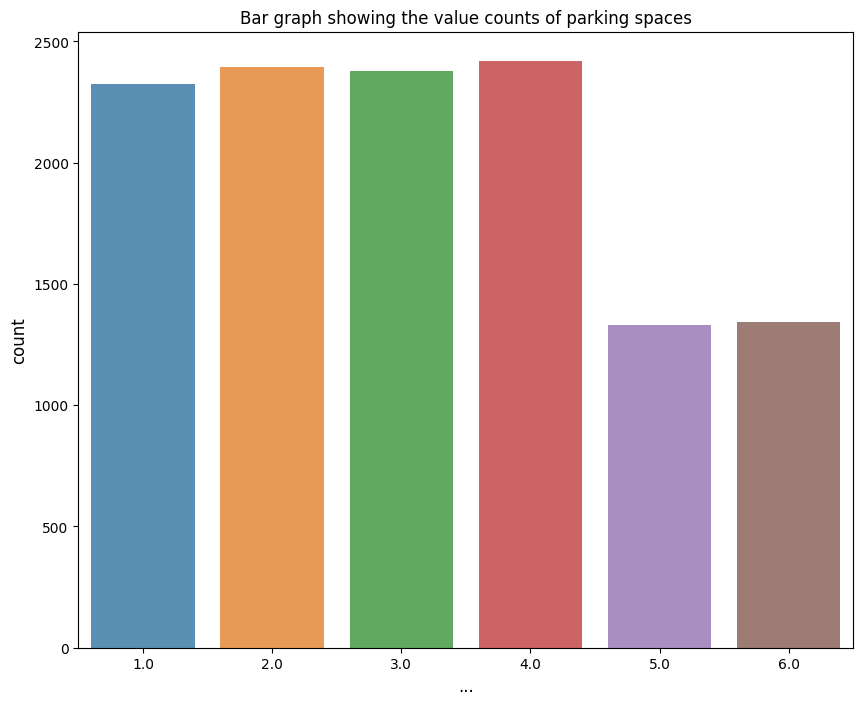

In [ ]:
plt.figure(figsize = (10, 8))
sns.barplot(x = parking_space_count.index, y = parking_space_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of parking spaces')
plt.ylabel('count', fontsize = 12)
plt.xlabel('...', fontsize = 12)
plt.show()

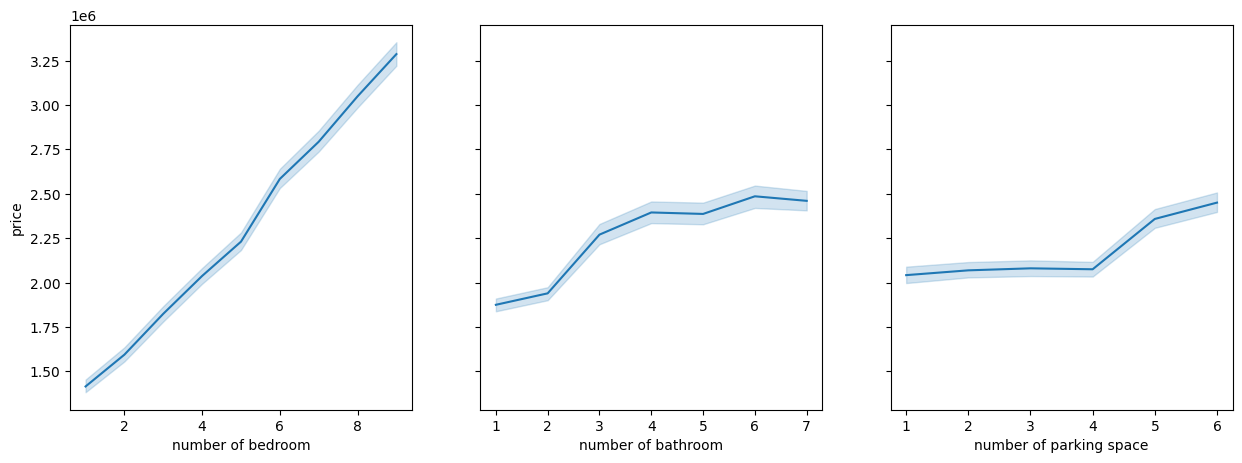

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# bedroom vs price
sns.lineplot(ax=axes[0], x=df['bedroom'].values, y=df['price'].values)
axes[0].set(xlabel='number of bedroom', ylabel = 'price');
#axes[0].set_title(hd['bedroom'].name)
# bathroom  vs price
sns.lineplot(ax=axes[1], x=df['bathroom'].values, y=df['price'].values)
axes[1].set(xlabel='number of bathroom', ylabel = 'price');
#axes[1].set_title(hd['bathroom'].name)

# parking_space vs price
sns.lineplot(ax=axes[2],  x=df['parking_space'].values, y=df['price'].values)
axes[2].set(xlabel='number of parking space', ylabel = 'price');
#axes[2].set_title(hd['parking_space'].name);

<ipython-input-60-06fa8591b5af>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(),


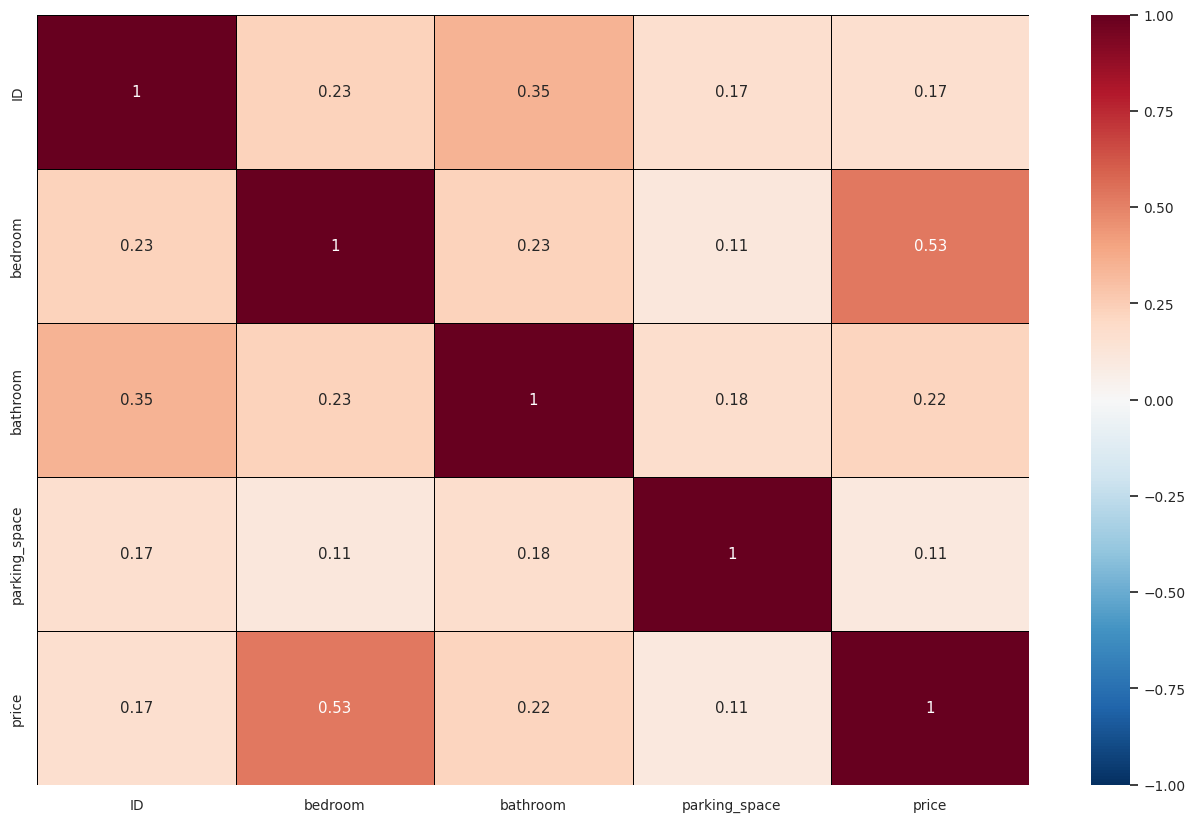

In [ ]:
sns.set(font_scale=0.9)
plt.figure(figsize=(16,10))
sns.heatmap(
    df.corr(),
    cmap='RdBu_r',
    annot=True,
    vmin=-1, vmax=1,
    linewidths=0.5,
    linecolor='black',
    square=False,
);

### Data Processing

In [ ]:
# Make a copy of the original DataFrame to perform edits on
df_new = df.copy()

In [ ]:
df_new.head()

,loc,title,bedroom,bathroom,parking_space,price
ID,,,,,,
3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [ ]:
#create a new colum titled total number of rooms
df_new["total_rooms"] = df_new["bedroom"] + df_new["bathroom"]
df_new.head()

,loc,title,bedroom,bathroom,parking_space,price,total_rooms
ID,,,,,,,
3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,4.0
2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689,NaN
9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814,12.0
2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,7.0
10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898,NaN


In [ ]:
df_new.isna().sum()

loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
total_rooms      3531
dtype: int64

In [ ]:
df_new['bedroom'].fillna(df_new['bedroom'].median(), inplace=True)
df_new['bathroom'].fillna(df_new['bathroom'].median(), inplace=True)
df_new['total_rooms'].fillna(df_new['total_rooms'].median(), inplace=True)
df_new.head()

,loc,title,bedroom,bathroom,parking_space,price,total_rooms
ID,,,,,,,
3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,4.0
2748,Ondo,Apartment,4.0,2.0,4.0,1672416.689,7.0
9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814,12.0
2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,7.0
10300,Kogi,Terrace duplex,4.0,5.0,6.0,2600700.898,7.0


In [ ]:
#one_hot encoding title
data_encoded = pd.get_dummies(df_new, columns=['title'], prefix='Type', drop_first=True)

#Now using knn to fill title
features_for_imputation = ['bedroom', 'bathroom', 'price']

# Create a copy of the dataset to work with
df_new = data_encoded.copy()

# Initialize KNN imputer
knn_imputer = KNNImputer(n_neighbors=10)  # We need to check for the best k

# Impute missing values using KNN
df_new[features_for_imputation] = knn_imputer.fit_transform(df_new[features_for_imputation])


In [ ]:
#categorising parking space
df_new['parking_space'].fillna(df_new['parking_space'].median(), inplace=True)
df_new['parking_cat'] = df_new['parking_space'].apply(lambda x: 0 if x < 5 else 1)
df_new.head()

,loc,bedroom,bathroom,parking_space,price,total_rooms,Type_Bungalow,Type_Cottage,Type_Detached duplex,Type_Flat,Type_Mansion,Type_Penthouse,Type_Semi-detached duplex,Type_Terrace duplex,Type_Townhouse,parking_cat
ID,,,,,,,,,,,,,,,,
3583,Katsina,2.0,2.0,1.0,1149999.565,4.0,0,0,0,0,0,0,1,0,0,0
2748,Ondo,4.0,2.0,4.0,1672416.689,7.0,0,0,0,0,0,0,0,0,0,0
9261,Ekiti,7.0,5.0,3.0,3364799.814,12.0,0,0,0,0,0,0,0,0,0,0
2224,Anambra,5.0,2.0,4.0,2410306.756,7.0,0,0,1,0,0,0,0,0,0,0
10300,Kogi,4.0,5.0,6.0,2600700.898,7.0,0,0,0,0,0,0,0,1,0,1


In [ ]:
df_new.drop('parking_space', axis =1, inplace =True)

In [ ]:
df_new['loc'].fillna('Unknown', inplace=True)

In [ ]:
df_new.drop('loc', axis = 1, inplace = True)

In [ ]:
data_new = pd.get_dummies(df_new, columns=['loc'], prefix='State', drop_first=True)

In [ ]:
data_new.head()

,bedroom,bathroom,price,total_rooms,Type_Bungalow,Type_Cottage,Type_Detached duplex,Type_Flat,Type_Mansion,Type_Penthouse,...,State_Ondo,State_Osun,State_Oyo,State_Plateau,State_Rivers,State_Sokoto,State_Taraba,State_Unknown,State_Yobe,State_Zamfara
ID,,,,,,,,,,,,,,,,,,,,,
3583,2.0,2.0,1149999.565,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2748,4.0,2.0,1672416.689,7.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9261,7.0,5.0,3364799.814,12.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2224,5.0,2.0,2410306.756,7.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10300,4.0,5.0,2600700.898,7.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


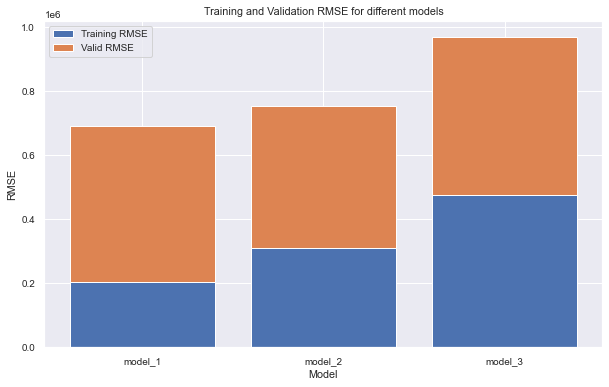

In [ ]:
import matplotlib.pyplot as plt

# Given dictionary
model_dict = {
    'model_1': {'Training RMSE': 202361.8198852052, 'Valid RMSE': 488563.6823814303},``
    'model_2': {'Training RMSE': 309000.51681594236, 'Valid RMSE': 445758.3327163733},
    'model_3': {'Training RMSE': 477035.96767841943, 'Valid RMSE': 492978.9572739865}
}

# Extract the model names and the RMSE values for training and validation
model_names = list(model_dict.keys())
training_rmse = [model_dict[model]['Training RMSE'] for model in model_names]
valid_rmse = [model_dict[model]['Valid RMSE'] for model in model_names]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, training_rmse, label='Training RMSE')
plt.bar(model_names, valid_rmse, bottom=training_rmse, label='Valid RMSE')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Training and Validation RMSE for different models')
plt.legend()
plt.show()


In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
# Predict using the model
lr_preds = linear_regression.predict(X_val)

# Calculate RMSE
lr_rmse = np.sqrt(mean_squared_error(y_val, lr_preds))

print(f'Baseline = Linear Regression RMSE: {lr_rmse:.2f}')

Baseline = Linear Regression RMSE: 581534.59


In [ ]:
# Split the dataset into features (X) and target variable (y)
X = data_new.drop("price", axis=1)
y = data_new['price']

# Split the data into training set (70%) and validation set (30%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:

# Hyperparameter tuning for XGBoost
xgb_params = {
    'n_estimators': [500, 600, 700],
    'max_depth': [2, 3, 5],
    'learning_rate': [0.1, 0.2, 0.3]
}
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_grid = GridSearchCV(xgb_regressor, param_grid=xgb_params, scoring='neg_mean_squared_error', cv=5)
xgb_grid.fit(X_train, y_train)
best_xgb_params = xgb_grid.best_params_

In [ ]:
# Hyperparameter tuning for Random Forest
rf_params = {
    'n_estimators': [600, 700, 800],
    'max_depth': [20, 30, 40],
    'min_samples_split': [15, 20, 25]
}
rf_regressor = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf_regressor, param_grid=rf_params, scoring='neg_mean_squared_error', cv=5)
rf_grid.fit(X_train, y_train)
best_rf_params = rf_grid.best_params_

In [ ]:
# Hyperparameter tuning for SVR
svr_params = {
    'C': [20, 30, 40],
    'kernel': ['linear', 'poly', 'rbf']
}
svr_regressor = SVR()
svr_grid = GridSearchCV(svr_regressor, param_grid=svr_params, scoring='neg_mean_squared_error', cv=5)
svr_grid.fit(X_train, y_train)
best_svr_params = svr_grid.best_params_

In [ ]:
# Train individual models with best hyperparameters
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', **best_xgb_params, random_state=42)
#rf_regressor = RandomForestRegressor(**best_rf_params, random_state=42)
#svr_regressor = SVR(**best_svr_params)

xgb_regressor.fit(X_train, y_train)
#rf_regressor.fit(X_train, y_train)
#svr_regressor.fit(X_train, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=700, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [ ]:
# Predict using individual models
xgb_train_preds = xgb_regressor.predict(X_train)
xgb_preds = xgb_regressor.predict(X_val)
#rf_preds = rf_regressor.predict(X_val)
#svr_preds = svr_regressor.predict(X_val)

Ensemble creation

In [ ]:
# Create meta-features from predictions
meta_features = np.column_stack((xgb_preds, rf_preds, svr_preds))

# Train a meta-model (Linear Regression) on meta-features
meta_model = LinearRegression()
meta_model.fit(meta_features, y_val)

# Cross-validation for the Ensemble
ensemble_rmse_scores = cross_val_score(meta_model, meta_features, y_val, scoring='neg_mean_squared_error', cv=5)
ensemble_rmse_scores = np.sqrt(-ensemble_rmse_scores)
average_ensemble_rmse = np.mean(ensemble_rmse_scores)

print(f'Ensemble RMSE: {average_ensemble_rmse:.2f}')
print('Best XGBoost Hyperparameters:', best_xgb_params)
print('Best Random Forest Hyperparameters:', best_rf_params)
print('Best SVR Hyperparameters:', best_svr_params)


Ensemble RMSE: 553776.75
Best XGBoost Hyperparameters: {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 500}
Best Random Forest Hyperparameters: {'max_depth': 30, 'min_samples_split': 15, 'n_estimators': 700}
Best SVR Hyperparameters: {'C': 20, 'kernel': 'linear'}


In [ ]:
print('Best XGBoost Hyperparameters:', best_xgb_params)

Best XGBoost Hyperparameters: {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 700}


checking each model

In [ ]:
xgb_train_rmse = np.sqrt(mean_squared_error(y_train, xgb_train_preds))
xgb_rmse = np.sqrt(mean_squared_error(y_val, xgb_preds))
#rf_rmse = np.sqrt(mean_squared_error(y_val, rf_preds))
#svr_rmse = np.sqrt(mean_squared_error(y_val, svr_preds))

#xgb_train_rmse
#xgb_train_rmse
xgb_rmse
#rf_rmse
#svr_rmse

557738.2029291514

analysing feature importances

In [ ]:
# Get feature importances
feature_importances = xgb_regressor.feature_importances_

# Retrieve the original feature names from the trained model
original_feature_names = xgb_regressor.get_booster().feature_names

# Create a dictionary to associate original feature names with their importances
importance_dict = {name: importance for name, importance in zip(original_feature_names, feature_importances)}

# Sort the dictionary by importance in descending order
sorted_importance_dict = dict(sorted(importance_dict.items(), key=lambda item: item[1], reverse=True))

# Print feature importances and original column names in descending order
for feature_name, importance in sorted_importance_dict.items():
    print(f'{feature_name}: {importance}')



State_Lagos: 0.16167967021465302
Type_Mansion: 0.12415172904729843
bedroom: 0.10066543519496918
State_Bayelsa: 0.06569179892539978
Type_Penthouse: 0.06038792058825493
State_Rivers: 0.04876416176557541
State_Kebbi: 0.036841195076704025
Type_Flat: 0.03153953328728676
State_Akwa Ibom: 0.029255742207169533
State_Delta: 0.027824269607663155
Type_Detached duplex: 0.027744224295020103
State_Yobe: 0.026428163051605225
Type_Bungalow: 0.023053685203194618
State_Ebonyi: 0.02071414887905121
State_Jigawa: 0.018291715532541275
State_Ogun: 0.018058540299534798
State_Borno: 0.017398254945874214
State_Sokoto: 0.016478313133120537
State_Cross River: 0.014656557701528072
State_Zamfara: 0.012799007818102837
State_Bauchi: 0.012614811770617962
Type_Cottage: 0.011080233380198479
State_Anambra: 0.008133395574986935
parking_cat: 0.007679320871829987
Type_Townhouse: 0.007306352723389864
bathroom: 0.0072078523226082325
State_Ondo: 0.006534126587212086
State_Kogi: 0.006283115595579147
State_Oyo: 0.006077592726796